<a id=top></a>

# AM10 - Spring 2020 

## Lab 10 - NEW

## Exploratory Data Analysis of the COVID-19 Pandemic

## The Forced SIR model

#### &copy; 2020 Eleni Angelaki Kaxiras, Efthimios Kaxiras

<BR>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.stats import norm

In [3]:
import pandas as pd
import seaborn as sns
import warnings
import glob
# extend pandas printing instead of ...
pd.options.display.max_columns = 500  
pd.options.display.max_rows = 3000     
pd.options.display.max_colwidth = 200
pd.options.display.precision = 3

### Import Daily Data from:
https://ourworldindata.org/coronavirus-source-data 
(Sourced from the European Centre for Disease Control)

In [18]:
data = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
daily_coronadata = pd.read_csv(data, index_col=False)
daily_coronadata.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,3.717e+07
1,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,3.717e+07
2,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,3.717e+07
3,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,3.717e+07
4,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,3.717e+07


In [19]:
#
# Find the 3-letter acronym for each country
#
country = 'China'
daily_coronadata[daily_coronadata['countriesAndTerritories']==country].countryterritoryCode.iloc[0]


'CHN'

In [20]:
country = 'United_States_of_America'
daily_coronadata[daily_coronadata['countriesAndTerritories']==country].countryterritoryCode.iloc[0]

'USA'

In [21]:
#
#  Display all the data for a country
#
country = 'United_States_of_America'
daily_coronadata[daily_coronadata['countriesAndTerritories']==country].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9580,10/04/2020,10,4,2020,33901,1873,United_States_of_America,US,USA,3.272e+08
9581,09/04/2020,9,4,2020,33323,1922,United_States_of_America,US,USA,3.272e+08
9582,08/04/2020,8,4,2020,30613,1906,United_States_of_America,US,USA,3.272e+08
9583,07/04/2020,7,4,2020,30561,1342,United_States_of_America,US,USA,3.272e+08
9584,06/04/2020,6,4,2020,25398,1146,United_States_of_America,US,USA,3.272e+08


In [22]:
#
#  Find the population of a country
#
country = 'United_States_of_America'
popul_USA=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
print(' Population U.S.A. %11i' %popul_USA)

 Population U.S.A.   327167434


In [23]:
country = 'China'
popul_CHN=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
print(' Population China %11i' %popul_CHN)

 Population China  1392730000


In [10]:
#
# Calculate t0, the day the exponential increase started
# (CHN = 17)
# (USA = 59)
#

In [24]:
country = 'China'
daily_all_CHN = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]

In [25]:
daily_CHN = daily_all_CHN[0:]
daily_CHN

array([   27,     0,     0,    17,     0,    15,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     4,
          17,   136,    19,   151,   140,    97,   259,   441,   665,
         787,  1753,  1466,  1740,  1980,  2095,  2590,  2812,  3237,
        3872,  3727,  3160,  3418,  2607,  2974,  2490,  2028, 15141,
        4156,  2538,  2007,  2052,  1890,  1750,   394,   891,   826,
         647,   218,   515,   410,   439,   329,   428,   574,   205,
         127,   119,   117,   170,   101,    46,    45,    20,    29,
          24,    22,    19,    22,    25,    43,    23,    44,    99,
          52,    65,   138,    69,    78,   102,    94,   119,   113,
          98,    84,    54,   100,    70,    62,    48,    67,    56,
          86,    86,    55])

In [26]:
daily_CHN = daily_all_CHN[17:]
daily_CHN

array([    4,    17,   136,    19,   151,   140,    97,   259,   441,
         665,   787,  1753,  1466,  1740,  1980,  2095,  2590,  2812,
        3237,  3872,  3727,  3160,  3418,  2607,  2974,  2490,  2028,
       15141,  4156,  2538,  2007,  2052,  1890,  1750,   394,   891,
         826,   647,   218,   515,   410,   439,   329,   428,   574,
         205,   127,   119,   117,   170,   101,    46,    45,    20,
          29,    24,    22,    19,    22,    25,    43,    23,    44,
          99,    52,    65,   138,    69,    78,   102,    94,   119,
         113,    98,    84,    54,   100,    70,    62,    48,    67,
          56,    86,    86,    55])

In [27]:
country = 'United_States_of_America'
daily_all_USA = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]

In [28]:
daily_USA = daily_all_USA[0:]
daily_USA

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     0,     0,     0,     1,     0,
           3,     0,     0,     0,     1,     1,     1,     3,     0,
           0,     1,     0,     0,     0,     0,     1,     0,     1,
           1,     0,     0,     0,     0,     0,     0,     1,    19,
           0,     0,    18,     0,     6,     1,     6,     3,    20,
          14,    22,    34,    74,   105,    95,   121,   200,   271,
         287,   351,   511,   777,   823,   887,  1766,  2988,  4835,
        5374,  7123,  8459, 11236,  8789, 13963, 16797, 18695, 19979,
       18360, 21595, 24998, 27103, 28819, 32425, 34272, 25398, 30561,
       30613, 33323, 33901])

In [29]:
daily_USA = daily_all_USA[59:]
daily_USA

array([    1,     6,     3,    20,    14,    22,    34,    74,   105,
          95,   121,   200,   271,   287,   351,   511,   777,   823,
         887,  1766,  2988,  4835,  5374,  7123,  8459, 11236,  8789,
       13963, 16797, 18695, 19979, 18360, 21595, 24998, 27103, 28819,
       32425, 34272, 25398, 30561, 30613, 33323, 33901])

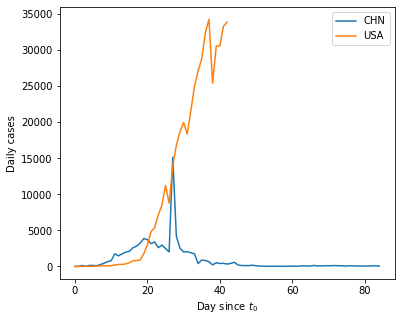

In [30]:
fig=plt.figure(figsize=(6,5))
plt.plot(daily_CHN,label='CHN')
plt.plot(daily_USA,label='USA')
plt.xlabel('Day since $t_0$')
plt.ylabel('Daily cases')
plt.legend()
fig.savefig('Total_10.png',format='png')

___________________________________________________________________________________________________________________________

### The SIR model

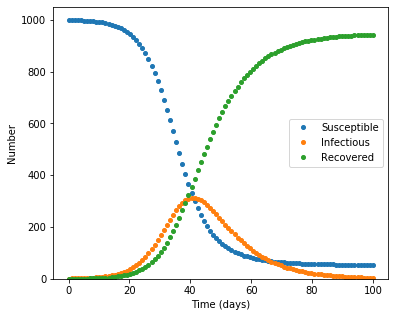

In [32]:
# Total population (N) and number of days (Ndays) of epidemic duration
N = 1000
Ndays=100

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.3
gamma = 1.0/10

# Generating the time array:
t = np.linspace(0, Ndays, Ndays)
dt=t[1]-t[0]

# Initializing the S, I, R arrays
S=np.zeros(Ndays)
I=np.zeros(Ndays)
R=np.zeros(Ndays)

# start with one infected individual

S[0]=N
I[0]=1
R[0]=0

# Solving the system of differential equations by S[n+1] = S[n] + (dt * dS/dt)
for n in range(Ndays-1):
    S[n+1]=S[n]+dt*(-beta*S[n]*I[n]/N)
    I[n+1]=I[n]+dt*(beta*S[n]*I[n]/N - gamma*I[n])
    R[n+1]=R[n]+dt*(gamma*I[n])
    
fig=plt.figure(figsize=(6,5))
plt.plot(t,S,'o',ms=4,label='Susceptible')
plt.plot(t,I,'o',ms=4,label='Infectious')
plt.plot(t,R,'o',ms=4,label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number')
plt.ylim(0,01.05*N)
plt.legend()
plt.show()

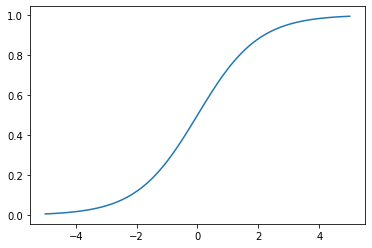

In [33]:
# The sigmoid function (a version of the theta-function) 
# Logistic growth
xmin=-5
xmax=5
Nx=100
x=np.linspace(xmin,xmax,Nx)

sigx=1.0/(1.0+np.exp(-x))

plt.plot(x,sigx)

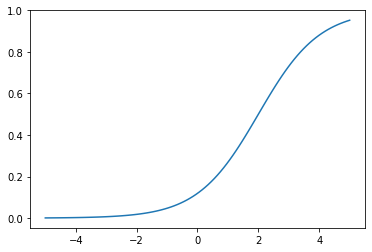

In [34]:
# The sigmoid function (parametrized by a, x0)
xmin=-5
xmax=5
Nx=100
x=np.linspace(xmin,xmax,Nx)

a=1.0
x0=2.0

sigx=1.0/(1.0+np.exp(-a*(x-x0)))

plt.plot(x,sigx)

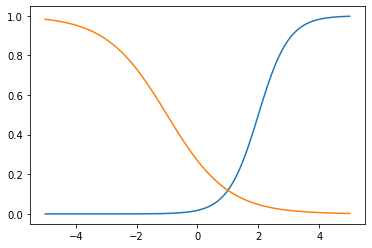

In [35]:
# Two sigmoid functions (sigmoid and 1-sigmoid)
xmin=-5
xmax=5
Nx=100
x=np.linspace(xmin,xmax,Nx)

a1=2.0
a2=1.0
x01=2.0
x02=-1.0
sigx1=1.0/(1.0+np.exp(-a1*(x-x01)))
sigx2=1.0-1.0/(1.0+np.exp(-a2*(x-x02)))

plt.plot(x,sigx1)
plt.plot(x,sigx2)

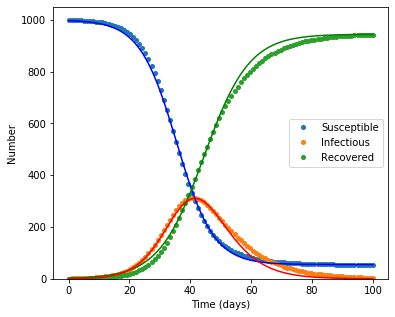

In [36]:
# Fit to model

def sigmoid(a,t0,t):
    return 1.0/(1.0+np.exp(-a*(t-t0)))

# parameters for beta=0.3, gamma=1/10   
a1=0.165
a2=0.135
N2=N-55
t1=35.5        # midpoint of S
dt=9.0         # difference between midpoints of S and R
t2=t1+dt       # midpoint of R 

Smod=N-N2*sigmoid(a1,t1,t)
Rmod=N2*sigmoid(a2,t2,t)

fig=plt.figure(figsize=(6,5))
plt.plot(t,S,'o',ms=4,label='Susceptible')
plt.plot(t,I,'o',ms=4,label='Infectious')
plt.plot(t,R,'o',ms=4,label='Recovered')

Imod=N-Rmod-Smod

plt.plot(t,Smod,'b-')
plt.plot(t,Rmod,'g-')
plt.plot(t,Imod,'r-')
plt.xlabel('Time (days)')
plt.ylabel('Number')
plt.ylim(0,01.05*N)
plt.legend()
plt.show()
fig.savefig('FSIR_model.png',format='png')

In [37]:
# Define here the model function for I(t) -difference of 2 sigmoids
# return the predicted graph of Infected(t)
def daily_fit(t,t1,dt,N2):
    a1=0.25
    a2=0.25
    t01=t1
    t02=t01+dt
    return N2*(sigmoid(a1,t01,t)-sigmoid(a2,t02,t))

___________________________________________________________________________________________________________________________

### Application: China

[  18.51307973   11.07121923 7344.09940198]
[[ 8.25173317e+00 -1.49594299e+01  8.89680603e+03]
 [-1.49594299e+01  2.99161808e+01 -1.77920977e+04]
 [ 8.89680603e+03 -1.77920977e+04  1.09704959e+07]]
[6.65655106e+01 8.52226841e+01 1.09019930e+02 1.39316800e+02
 1.77796941e+02 2.26523118e+02 2.87987235e+02 3.65143825e+02
 4.61408843e+02 5.80597257e+02 7.26764353e+02 9.03910140e+02
 1.11550955e+03 1.36385181e+03 1.64921841e+03 1.96900165e+03
 2.31695000e+03 2.68278492e+03 3.05241678e+03 3.40886391e+03
 3.73377282e+03 4.00924175e+03 4.21956832e+03 4.35262240e+03
 4.40072976e+03 4.36112313e+03 4.23608041e+03 4.03281188e+03
 3.76304480e+03 3.44218638e+03 3.08799678e+03 2.71886729e+03
 2.35198766e+03 2.00178068e+03 1.67891659e+03 1.39003035e+03
 1.13805531e+03 9.22952950e+02 7.42591426e+02 5.93579217e+02
 4.71943756e+02 3.73619598e+02 2.94759520e+02 2.31904712e+02
 1.82054904e+02 1.42674220e+02 1.11660143e+02 8.72945116e+01
 6.81886207e+01 5.32294549e+01 4.15307097e+01 3.23901244e+01
 2.525340

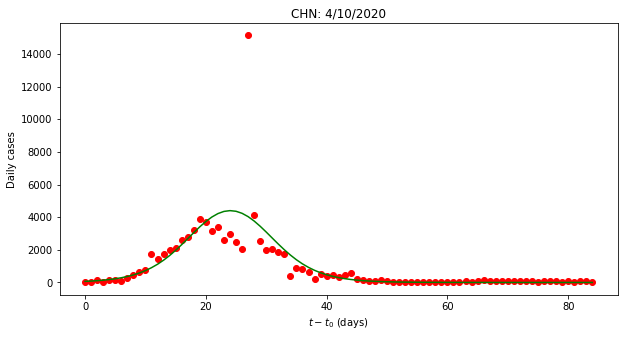

In [117]:
# CHN daily data and parameters

fdat = daily_CHN
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
print(pcov)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)
print(ffit)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('CHN: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_CHN.png',format='png')

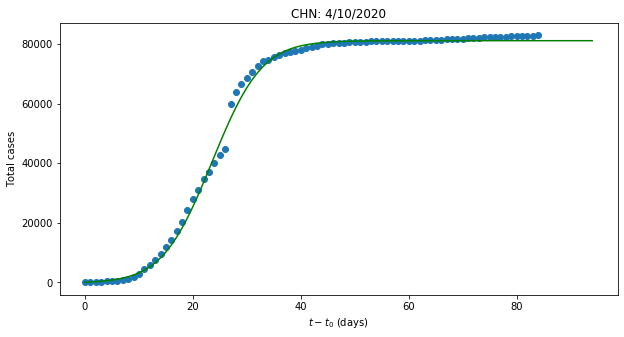

In [115]:
# CHN CUMULATIVE data and time-extension (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=10
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]


fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('CHN: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_CHN.png',format='png')

In [40]:
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

81072.40273707172 -41


__________________________________________________________________________________________________________________________

### Application: Spain

In [41]:
country = 'Spain'
daily_all_ESP = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]

In [42]:
daily_ESP = daily_all_ESP[0:]
daily_ESP

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    4,    5,   13,    9,   32,   17,   31,   37,   49,
         61,  113,   56,  159,  615,  435,  501,  864, 1227, 1522, 2000,
       1438, 1987, 2538, 3431, 2833, 4946, 3646, 4517, 6584, 7937, 8578,
       7871, 8189, 6549, 6398, 9222, 7719, 8102, 7472, 7026, 6023, 4273,
       5478, 6180, 5756])

In [43]:
daily_ESP = daily_all_ESP[56:]
daily_ESP

array([   1,    4,    5,   13,    9,   32,   17,   31,   37,   49,   61,
        113,   56,  159,  615,  435,  501,  864, 1227, 1522, 2000, 1438,
       1987, 2538, 3431, 2833, 4946, 3646, 4517, 6584, 7937, 8578, 7871,
       8189, 6549, 6398, 9222, 7719, 8102, 7472, 7026, 6023, 4273, 5478,
       6180, 5756])

[  26.86272186   17.51430033 9979.39394553]


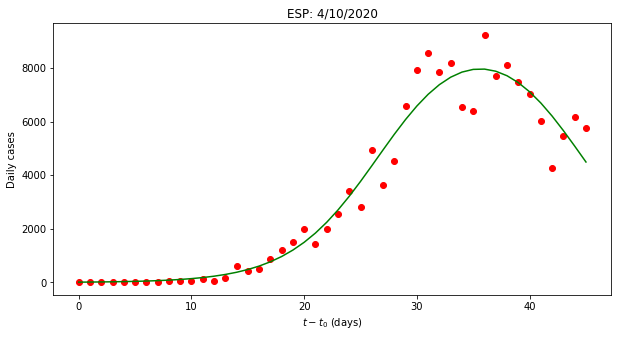

In [44]:
# ESP daily data and parameters

fdat = daily_ESP
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('ESP: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_ESP.png',format='png')

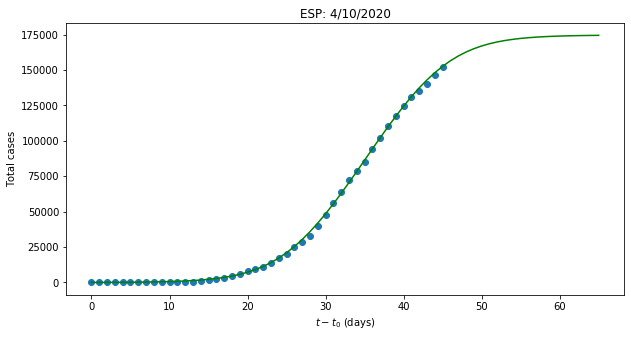

In [45]:
# ESP CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('ESP: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_ESP.png',format='png')

In [47]:
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat)) # the total number of cases and number of days until the end

174540.53612837408 10


___________________________________________________________________________________________________________________________

### Application: USA

[2.87873346e+01 1.61969730e+02 3.39951154e+04]


/Users/paul/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


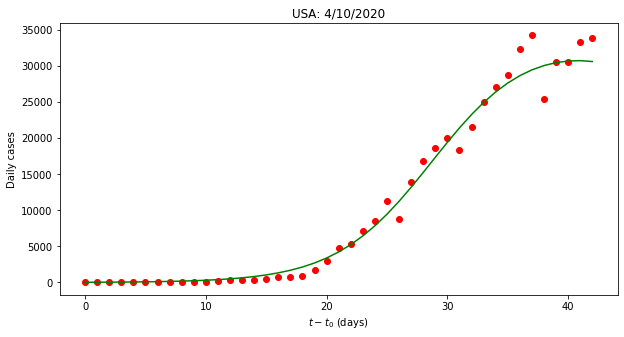

In [48]:
# USA daily data and parameters

fdat = daily_USA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

dt=24

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('USA: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_USA.png',format='png')

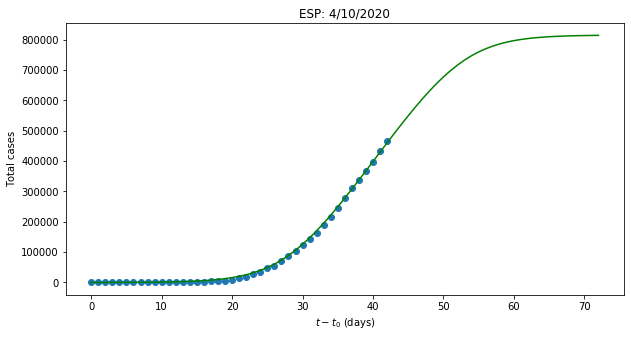

In [51]:
# USA CUMULATIVE data and time-extension (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=30
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('USA: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_USA.png',format='png')

In [52]:
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))    # Nt and number of days (from now) to achieve Nt

814817.4138850593 20


__________________________________________________________________________________________________________________________

# Problem 1

Apply the model and predict Nt and the number of days (from now) to achieve Nt, for the following countries:
- Italy
- France
- Netherlands
- Switzerland
- Germany
- Greece
    

In [75]:
country = 'Italy'
daily_all_ITA = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]

In [76]:
daily_ITA = daily_all_ITA[0:]
daily_ITA

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    3,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   14,   62,
         53,   97,   93,   78,  250,  238,  240,  561,  347,  466,  587,
        769,  778, 1247, 1492, 1797,  977, 2313, 2651, 2547, 3497, 2823,
       4000, 3526, 4207, 5322, 5986, 6557, 5560, 4789, 5249, 5210, 6153,
       5959, 5974, 5217, 4050, 4053, 4782, 4668, 4585, 4805, 4316, 3599,
       3039, 3836, 4204])

In [77]:
daily_ITA = daily_all_ITA[53:]
daily_ITA

array([  14,   62,   53,   97,   93,   78,  250,  238,  240,  561,  347,
        466,  587,  769,  778, 1247, 1492, 1797,  977, 2313, 2651, 2547,
       3497, 2823, 4000, 3526, 4207, 5322, 5986, 6557, 5560, 4789, 5249,
       5210, 6153, 5959, 5974, 5217, 4050, 4053, 4782, 4668, 4585, 4805,
       4316, 3599, 3039, 3836, 4204])

[  21.03385145   27.22375568 5819.39259472]


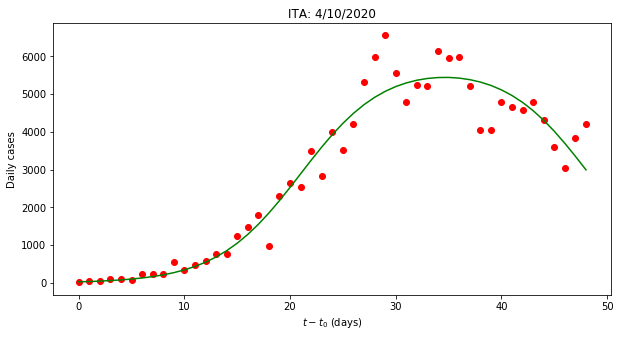

In [78]:
# Italy daily data and parameters

fdat = daily_ITA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('ITA: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_ITA.png',format='png')

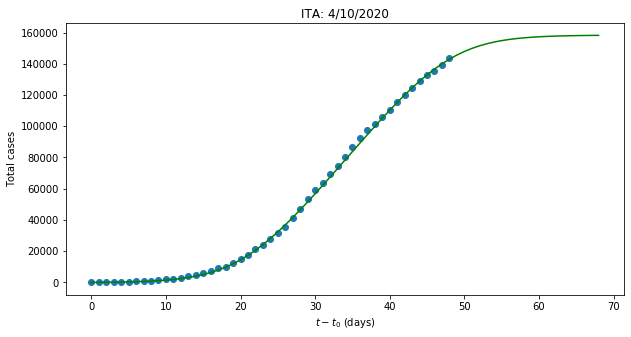

158172.85932082363 9


In [79]:
# ITA CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('ITA: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_ITA.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))    # Nt and number of days (from now) to achieve Nt

In [80]:
# France
country = 'France'
daily_all_FRA = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_FRA = daily_all_FRA[0:]
daily_FRA

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    3,    0,    0,    0,    1,    1,    1,    0,
          0,    0,    0,    0,    0,    0,    5,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    2,    3,   21,   19,   43,   30,   48,   34,   73,
        138,  190,  103,  410,  286,  372,  497,  595,  785,  838,  924,
       1210, 1097, 1404, 1861, 1617, 1847, 1559, 3838, 2446, 2931, 3922,
       3809, 4611, 2599, 4376, 7578, 4861, 2116, 5233, 4267, 1873, 3912,
       3777, 3881, 4286])

In [81]:
daily_FRA = daily_all_FRA[57:]
daily_FRA

array([   2,    3,   21,   19,   43,   30,   48,   34,   73,  138,  190,
        103,  410,  286,  372,  497,  595,  785,  838,  924, 1210, 1097,
       1404, 1861, 1617, 1847, 1559, 3838, 2446, 2931, 3922, 3809, 4611,
       2599, 4376, 7578, 4861, 2116, 5233, 4267, 1873, 3912, 3777, 3881,
       4286])

[  25.78732385   21.77369899 4927.97516124]


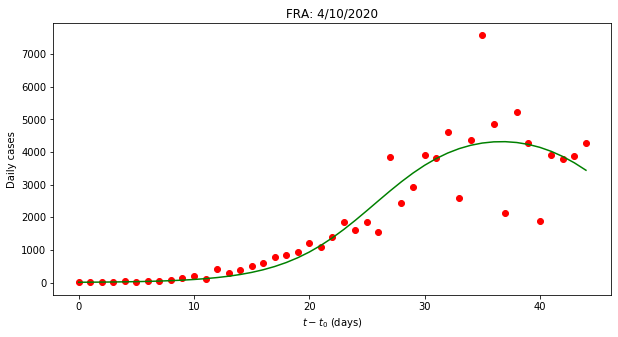

In [82]:
# France daily data and parameters

fdat = daily_FRA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('FRA: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_FRA.png',format='png')

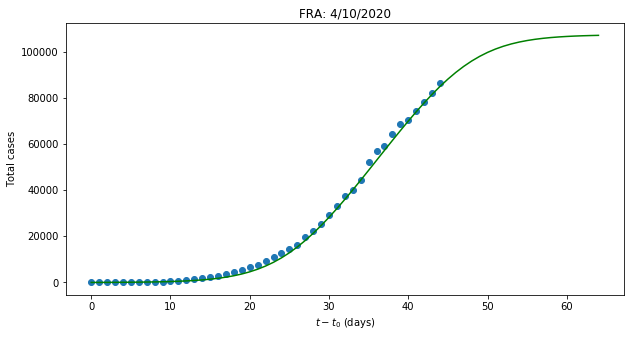

106991.37879507737 13


In [83]:
# FRA CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('FRA: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_FRA.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat)) 

In [84]:
# Netherlands
country = 'Netherlands'
daily_all_NLD = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_NLD = daily_all_NLD[0:]
daily_NLD

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    1,    5,    6,    5,   10,   10,
         44,   46,   60,   77,   56,   61,  121,  111,  190,  155,  176,
        278,  292,  346,  409,  534,  637,  573,  545,  811,  852, 1019,
       1172, 1159, 1104,  884,  845, 1019, 1083, 1026,  904, 1224,  952,
        777,  969, 1213])

In [85]:
daily_NLD = daily_all_NLD[60:]
daily_NLD

array([   1,    5,    6,    5,   10,   10,   44,   46,   60,   77,   56,
         61,  121,  111,  190,  155,  176,  278,  292,  346,  409,  534,
        637,  573,  545,  811,  852, 1019, 1172, 1159, 1104,  884,  845,
       1019, 1083, 1026,  904, 1224,  952,  777,  969, 1213])

[  21.61714046   27.44963224 1124.83851263]


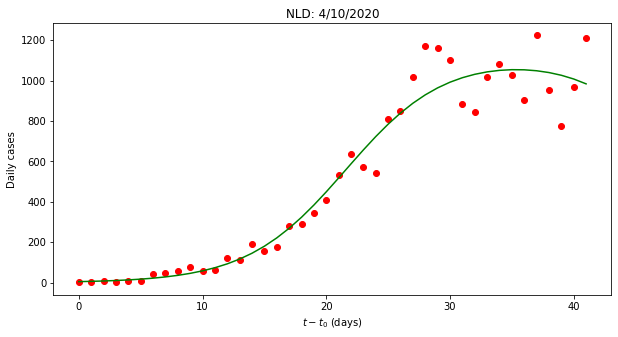

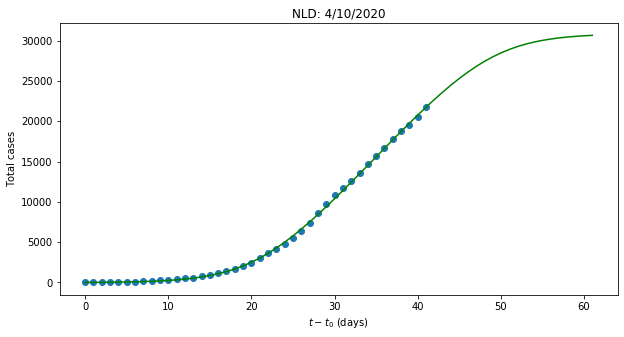

30662.6805487033 16


In [86]:
# Netherlands daily data and parameters

fdat = daily_NLD
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('NLD: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_NLD.png',format='png')



# NLD CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('NLD: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_NLD.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat)) 

In [89]:
#Switzerland
country = 'Switzerland'
daily_all_CHE = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_CHE = daily_all_CHE[0:]
daily_CHE

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    7,    4,    6,    6,    6,    7,   20,
         30,  122,   55,   68,   42,  116,  152,  212,  267,  238,  841,
          0,  450,  360,  878,  952, 1237,  894, 1044,  774,  925, 1000,
       1390, 1048, 1122, 1138,  696,  962, 1124, 1033,  974,  821,  552,
        590,  546,  785])

In [92]:
daily_CHE = daily_all_CHE[57:]
daily_CHE

array([   1,    0,    7,    4,    6,    6,    6,    7,   20,   30,  122,
         55,   68,   42,  116,  152,  212,  267,  238,  841,    0,  450,
        360,  878,  952, 1237,  894, 1044,  774,  925, 1000, 1390, 1048,
       1122, 1138,  696,  962, 1124, 1033,  974,  821,  552,  590,  546,
        785])

[  22.12407214   20.40686509 1280.82610784]


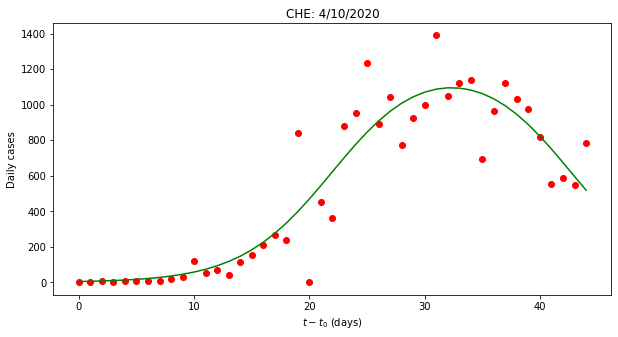

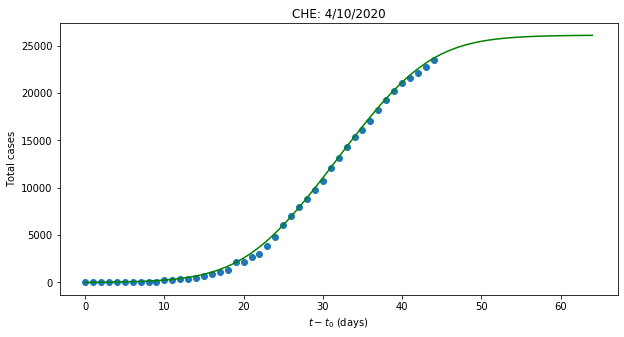

26099.04411351131 9


In [95]:
# Switzerland daily data and parameters

fdat = daily_CHE
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('CHE: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_CHE.png',format='png')



# CHE CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('CHE: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_CHE.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat)) 

In [96]:
#Germany
country = 'Germany'
daily_all_GER = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_GER = daily_all_GER[0:]
daily_GER

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,    3,    0,    1,    2,
          1,    1,    2,    0,    0,    1,    1,    0,    0,    0,    2,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    2,    4,   26,   10,   54,   18,   28,   39,   66,
        138,  284,  163,   55,  237,  157,  271,  802,  693,  733, 1043,
       1174, 1144, 1042, 5940, 4049, 3276, 3311, 4438, 2342, 4954, 5780,
       6294, 3965, 4751, 4615, 5453, 6156, 6174, 6082, 5936, 3677, 3834,
       4003, 4974, 5323])

In [98]:
daily_GER = daily_all_GER[57:]
daily_GER

array([   2,    4,   26,   10,   54,   18,   28,   39,   66,  138,  284,
        163,   55,  237,  157,  271,  802,  693,  733, 1043, 1174, 1144,
       1042, 5940, 4049, 3276, 3311, 4438, 2342, 4954, 5780, 6294, 3965,
       4751, 4615, 5453, 6156, 6174, 6082, 5936, 3677, 3834, 4003, 4974,
       5323])

[  23.77042007   24.31686305 5941.17301783]


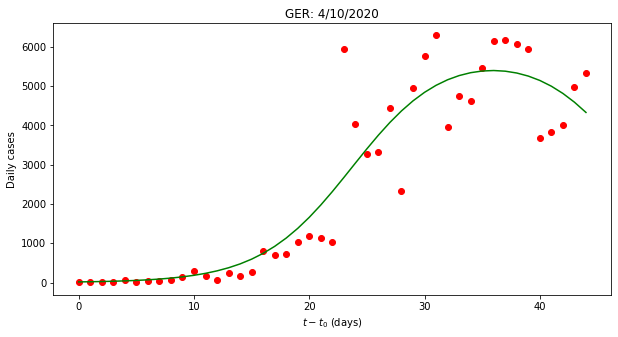

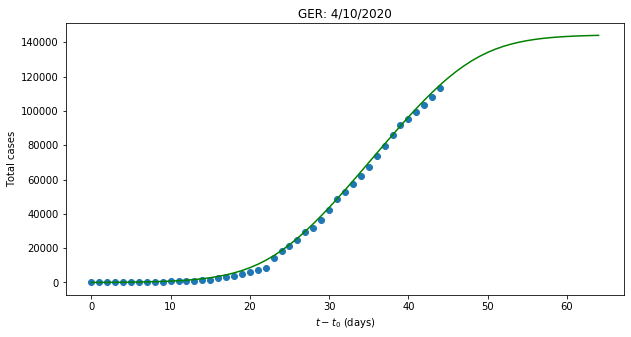

144028.46410875442 13


In [99]:
# Germany daily data and parameters

fdat = daily_GER
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('GER: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_GER.png',format='png')



# GER CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('GER: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_GER.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat)) 

In [100]:
#Greece
country = 'Greece'
daily_all_GRE = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_GRE = daily_all_GRE[0:]
daily_GRE

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   2,   1,   3,   0,   3,  22,
        13,  21,   7,  11,   6,   9,  34,  57,  38, 103,  21,  35,  31,
        46,  31,  35,  94,  71,  48,  78,  71,  74,  95,  95,  56, 102,
        61, 139,  99,  60,  62,  20,  77,  52,  71])

In [101]:
daily_GRE = daily_all_GRE[58:]
daily_GRE

array([  1,   2,   1,   3,   0,   3,  22,  13,  21,   7,  11,   6,   9,
        34,  57,  38, 103,  21,  35,  31,  46,  31,  35,  94,  71,  48,
        78,  71,  74,  95,  95,  56, 102,  61, 139,  99,  60,  62,  20,
        77,  52,  71])

[16.80227228 27.25925843 83.59464937]


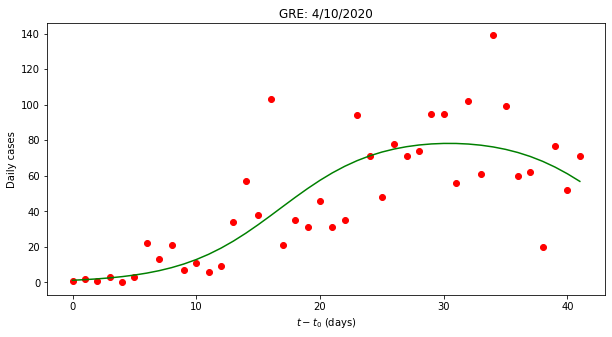

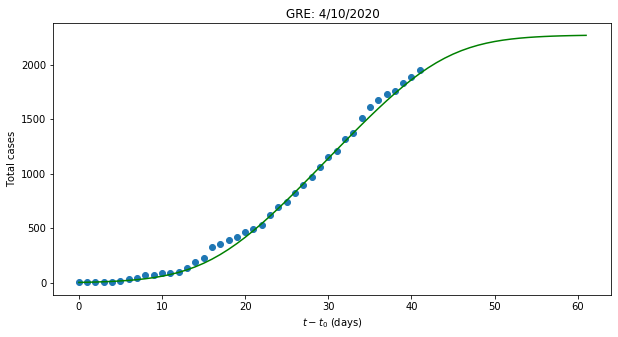

2270.1188260417352 12


In [102]:
# Greece daily data and parameters

fdat = daily_GRE
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('GRE: 4/10/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_GRE.png',format='png')



# GRE CUMULATIVE data and time-externsion (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=20
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('GRE: 4/10/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_GRE.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat)) 

## Problem 2

Instead of copy-pasting code for each country, write a general function to expedite the work, which should be done in Problem 1. 

Repeat the tasks of Problem 1, but now use the general function you have written. Compare the results.

In [111]:
def predict_COVID_19(list_of_countries):

    for country in list_of_countries:
        daily_all_XXX = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
        country_code = daily_coronadata[daily_coronadata['countriesAndTerritories']==country].countryterritoryCode.iloc[0]
        # Assuming all European countries started to have an outbreak on the 55th day
        daily_XXX = daily_all_XXX[55:] 

        # Country XXX daily data and parameters

        fdat = daily_XXX
        xdat = np.arange(len(fdat))

        popt, pcov = curve_fit(daily_fit, xdat, fdat)
        print(popt)
        t1=popt[0]
        dt=popt[1]
        N2=popt[2]

        ffit=daily_fit(xdat, t1, dt, N2)

        fig=plt.figure(figsize=(10,5))
        plt.plot(xdat,fdat,'ro')
        plt.plot(xdat,ffit,'g')
        plt.title(f'{country_code}: 4/10/2020')
        plt.ylabel('Daily cases')
        plt.xlabel('$t-t_0$ (days)')
        plt.show();
        fig.savefig(f'Daily_{country_code}.png',format='png')



        # XXX CUMULATIVE data and time-externsion (PREDICTION)

        cumm_dat=np.zeros(len(fdat))
        cumm_dat[0]=fdat[0]
        for i in range (1,len(fdat)):
            cumm_dat[i]=cumm_dat[i-1]+fdat[i]

        T_ext=20
        xdat_ext = np.arange(len(fdat)+T_ext)
        ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
        cumm_fit=np.zeros(len(fdat)+T_ext)
        cumm_fit[0]=ffit[0]
        for i in range (1,len(fdat)+T_ext):
            cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

        fig=plt.figure(figsize=(10,5))
        plt.scatter(xdat,cumm_dat)
        plt.plot(xdat_ext,cumm_fit,'g')
        plt.title(f'{country_code}: 4/10/2020')
        plt.ylabel('Total cases')
        plt.xlabel('$t-t_0$ (days)')
        #plt.legend()
        plt.show();
        fig.savefig(f'Total_{country_code}.png',format='png')

        # Estimating
        Nt=cumm_fit[-1]
        Ncut=0.99*Nt
        for i in range (len(xdat_ext)):
            if cumm_fit[i] > Ncut:
                imax=i
                break

        print(f'Total cases: {int(Nt)} cases, Days until peak: {imax-len(xdat)} days') 
        print('-----------------------------------------------------------------------------------------')
        print('\n\n\n')


[  19.03396427   27.22356863 5819.41490219]


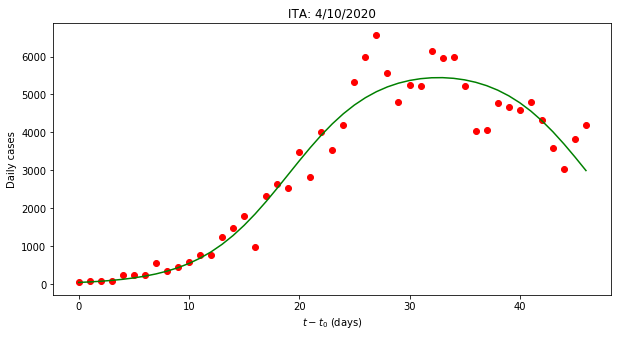

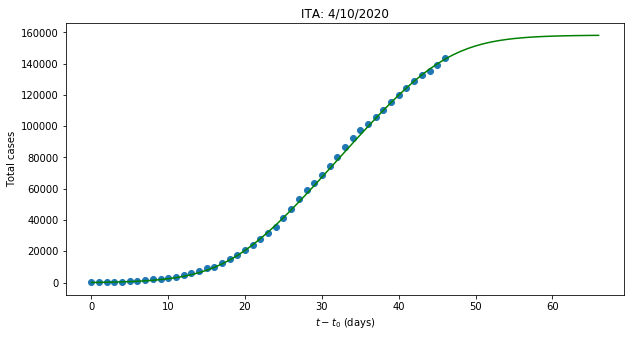

Total cases: 158103 cases, Days until peak: 9 days
-----------------------------------------------------------------------------------------




[  27.78735535   21.77363648 4927.98340868]


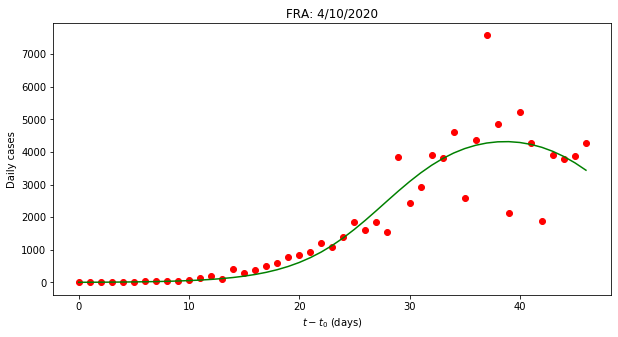

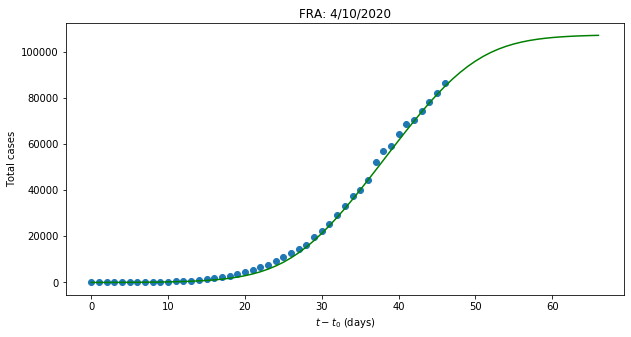

Total cases: 107002 cases, Days until peak: 13 days
-----------------------------------------------------------------------------------------




[  26.61742102   27.4484955  1124.85455898]


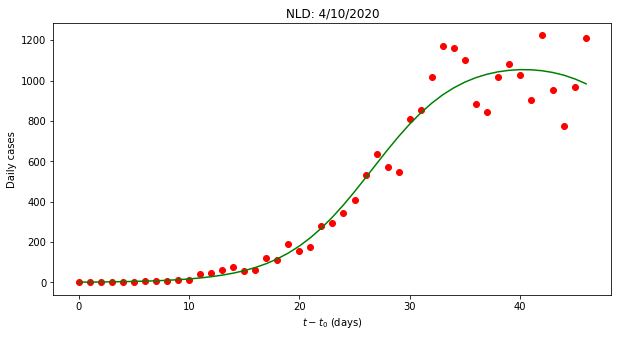

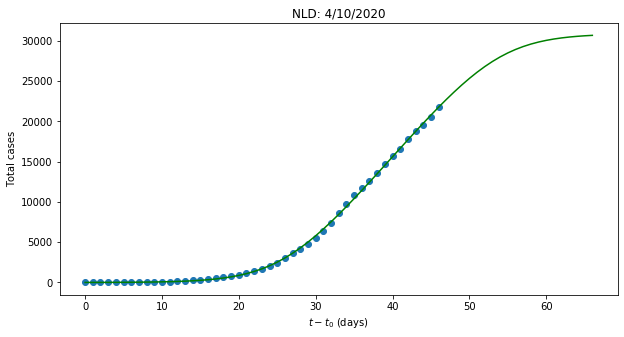

Total cases: 30674 cases, Days until peak: 16 days
-----------------------------------------------------------------------------------------




[  24.12423747   20.40660308 1280.83678671]


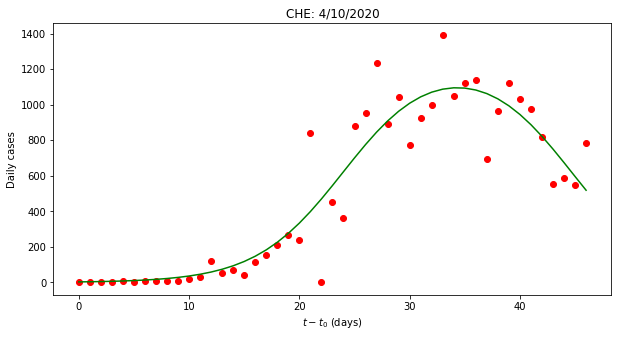

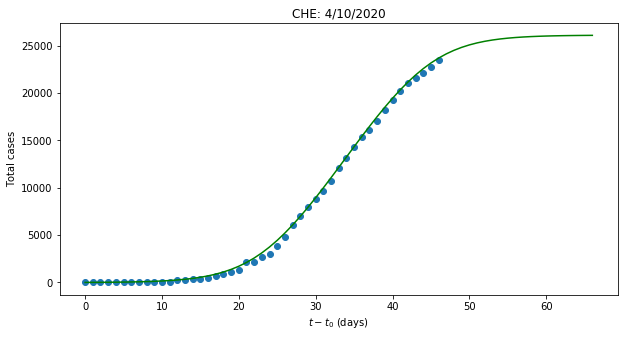

Total cases: 26105 cases, Days until peak: 9 days
-----------------------------------------------------------------------------------------




[  25.77049092   24.31672152 5941.19145755]


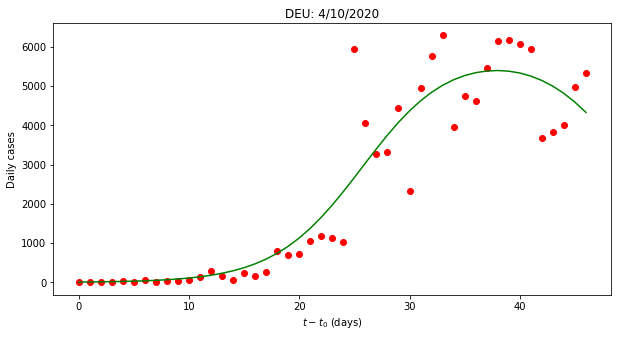

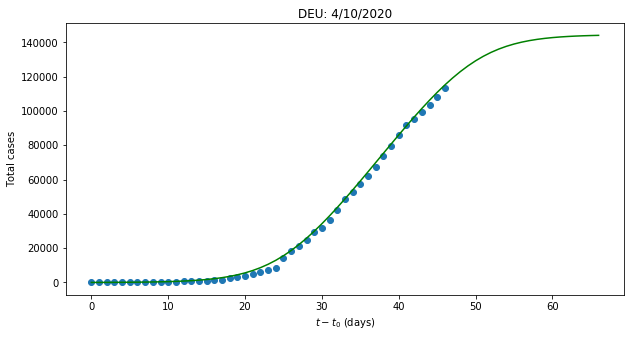

Total cases: 144049 cases, Days until peak: 13 days
-----------------------------------------------------------------------------------------




[19.80629651 27.25214096 83.6068647 ]


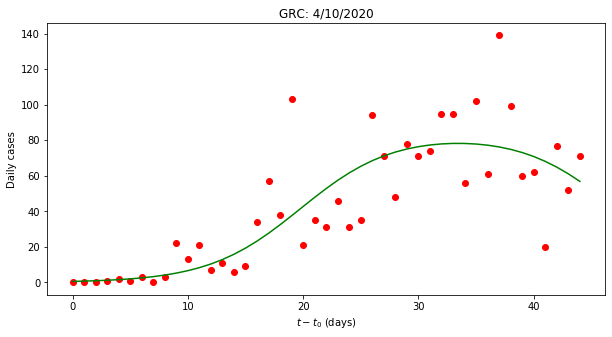

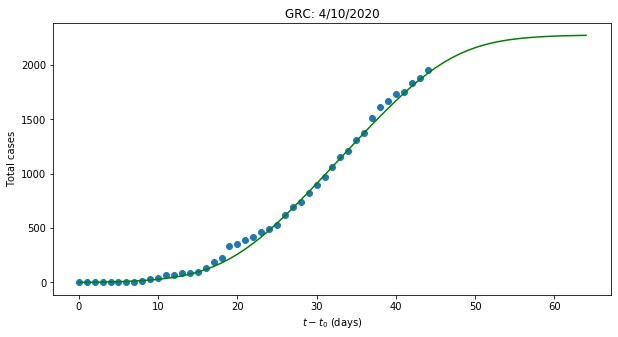

Total cases: 2272 cases, Days until peak: 12 days
-----------------------------------------------------------------------------------------






In [112]:
list_of_countries = ['Italy', 'France', 'Netherlands', 'Switzerland', 'Germany', 'Greece']
predict_COVID_19(list_of_countries)